In [2]:
!pip install pandas matplotlib numpy

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

font = {'size': 16}

matplotlib.rc('font', **font)

# Plot submitted workload

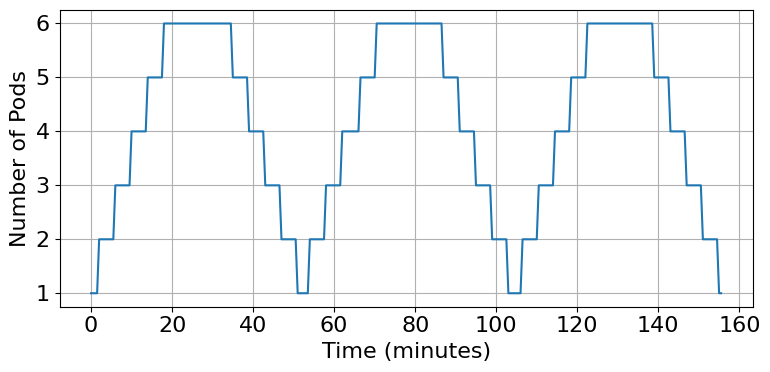

In [9]:
# Read the CSV file
data = pd.read_csv("Data/N_pods.csv")

# Convert 'Time' column to datetime
data["Time"] = pd.to_datetime(data["Time"])

# Compute progressive minutes (relative to the first timestamp)
data["Minutes"] = (data["Time"] - data["Time"].iloc[0]).dt.total_seconds() / 60

# Plot
plt.figure(figsize=(8, 4))
plt.plot(data["Minutes"], data["n_pod"], linestyle='-')

# set y min to be 0
#plt.ylim(bottom=0)

#set y steps to be equal to 1
plt.yticks(np.arange(min(data["n_pod"]), max(data["n_pod"])+1, 1))

# Labels and title
plt.xlabel("Time (minutes)")
plt.ylabel("Number of Pods")
plt.grid(True)
plt.tight_layout()
plt.savefig("Plot/Applied_workload.pdf")
plt.show()

# Plot resource efficiency

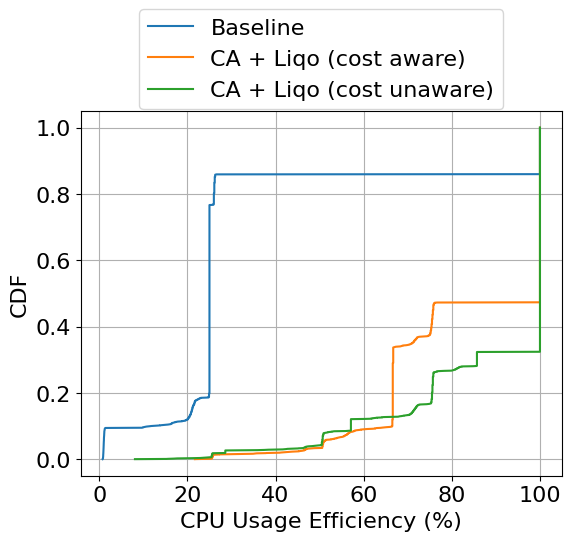

In [12]:
# Read the CSV file
data = pd.read_csv("Data/CA_cost_aware/Efficiency.csv")
data2 = pd.read_csv("Data/Baseline/Efficiency.csv")
data3 = pd.read_csv("Data/CA_cost_unaware/Efficiency.csv")

# Drop the 'rmedina' column
#data = data.drop(columns=["rmedina"])
#data2 = data2.drop(columns=["rmedina"])

if "remote2" not in data.columns:
  data["remote2"] = 100
if "remote3" not in data.columns:
  data["remote3"] = 100
if "remote4" not in data.columns:
  data["remote4"] = 100
if "remote5" not in data.columns:
  data["remote5"] = 100

if "remote2" not in data3.columns:
  data3["remote2"] = 100
if "remote3" not in data3.columns:
  data3["remote3"] = 100
if "remote4" not in data3.columns:
  data3["remote4"] = 100
if "remote5" not in data3.columns:
  data3["remote5"] = 100


# Replace missing values (NaN) with 100
data = data.fillna(100)
data2 = data2.fillna(100)
data3 = data3.fillna(100)

# Flatten all numeric values into a single array (excluding the 'Time' column)
values = data2.drop(columns=["Time"]).values.flatten()

# Sort the values for CDF computation
sorted_values = np.sort(values)

# Compute CDF
cdf = np.arange(1, len(sorted_values) + 1) / len(sorted_values)

# Plot CDF
plt.figure(figsize=(6, 6))
plt.plot(sorted_values, cdf, linestyle='-', label="Baseline")




# Flatten all numeric values into a single array (excluding the 'Time' column)
values = data.drop(columns=["Time"]).values.flatten()

# Sort the values for CDF computation
sorted_values = np.sort(values)

# Compute CDF
cdf = np.arange(1, len(sorted_values) + 1) / len(sorted_values)

# Plot CDF
plt.plot(sorted_values, cdf, linestyle='-', label="CA + Liqo (cost aware)")




# Flatten all numeric values into a single array (excluding the 'Time' column)
values = data3.drop(columns=["Time"]).values.flatten()

# Sort the values for CDF computation
sorted_values = np.sort(values)

# Compute CDF
cdf = np.arange(1, len(sorted_values) + 1) / len(sorted_values)

# Plot CDF
plt.plot(sorted_values, cdf, linestyle='-', label="CA + Liqo (cost unaware)")

# Labels and title
plt.xlabel("CPU Usage Efficiency (%)")
plt.ylabel("CDF")
plt.legend(loc="upper center",
    bbox_to_anchor=(0.5, 1.31),  # (x, y) position relative to the axes
    ncol=1,                      # arrange legend items in one row
           )
#plt.title("CDF of All Records (excluding rmedina, NaN = 100)")
plt.grid(True)
plt.tight_layout()
plt.savefig("Plot/Efficiency.pdf")
plt.show()

# Plot number of nodes

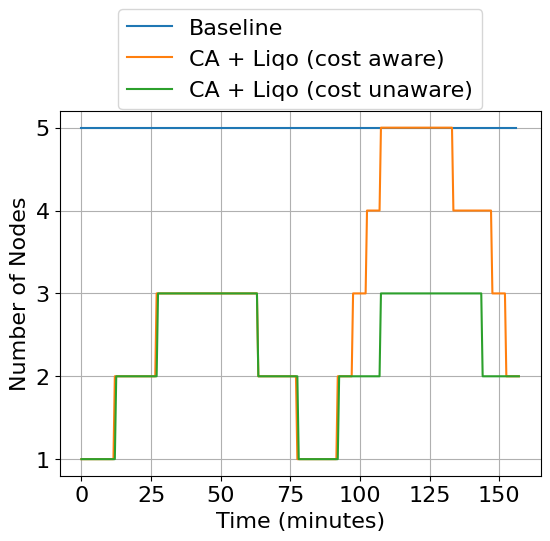

In [4]:
# Read the CSV file
data = pd.read_csv("Data/CA_cost_aware/N_nodes.csv")
data2 = pd.read_csv("Data/CA_cost_unaware/N_nodes.csv")
data3 = pd.read_csv("Data/Baseline/N_nodes.csv")

# Convert 'Time' column to datetime
data["Time"] = pd.to_datetime(data["Time"])
data2["Time"] = pd.to_datetime(data["Time"])
data3["Time"] = pd.to_datetime(data["Time"])

# Compute progressive minutes (relative to the first timestamp)
data["Minutes"] = (data["Time"] - data["Time"].iloc[0]).dt.total_seconds() / 60
data2["Minutes"] = (data2["Time"] - data2["Time"].iloc[0]).dt.total_seconds() / 60
data3["Minutes"] = (data3["Time"] - data3["Time"].iloc[0]).dt.total_seconds() / 60

# Plot
plt.figure(figsize=(6, 6))
plt.plot(data3["Minutes"], data3["count(kube_node_info)"], linestyle='-', label="Baseline")
plt.plot(data["Minutes"], data["count(kube_node_info)"], linestyle='-', label="CA + Liqo (cost aware)")
plt.plot(data2["Minutes"], data2["count(kube_node_info)"], linestyle='-', label="CA + Liqo (cost unaware)")


#plt.hlines(y=5, xmin=0, xmax=160, colors='red', linestyles='-', label='baseline')

# Labels and title
plt.legend(loc="upper center",
    bbox_to_anchor=(0.5, 1.31),  # (x, y) position relative to the axes
    ncol=1, )
plt.xlabel("Time (minutes)")
plt.ylabel("Number of Nodes")
plt.grid(True)
plt.tight_layout()
plt.savefig("Plot/N_nodes.pdf")
plt.show()

# Plot cumulative cost

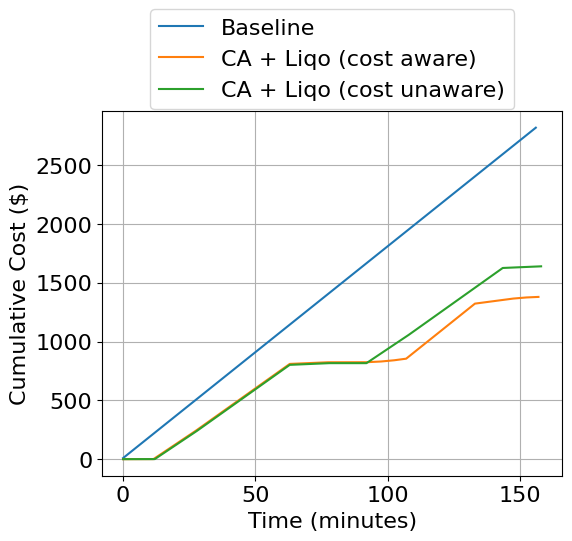

In [6]:
# Read the CSV file
data = pd.read_csv("Data/CA_cost_aware/Nodes_up.csv")
data2 = pd.read_csv("Data/Baseline/Nodes_up.csv")
data3 = pd.read_csv("Data/CA_cost_unaware/Nodes_up.csv")


# Drop 'rmedina' column (ignore duplicates safely)
data = data.loc[:, ~data.columns.duplicated()]
data = data.drop(columns=["rmedina"], errors="ignore")

data2 = data2.loc[:, ~data2.columns.duplicated()]
data2 = data2.drop(columns=["rmedina"], errors="ignore")

data3 = data3.loc[:, ~data3.columns.duplicated()]
data3 = data3.drop(columns=["rmedina"], errors="ignore")

# Convert 'Time' to datetime
data["Time"] = pd.to_datetime(data["Time"])
data2["Time"] = pd.to_datetime(data2["Time"])
data3["Time"] = pd.to_datetime(data3["Time"])


# Replace NaNs with 0 (inactive)
data = data.fillna(0)
data2 = data2.fillna(0)
data3 = data3.fillna(0)


# Define cost per minute
cost_per_min = {"remote2": 10}
expensive_node = "remote2"
expensive_node_cost = 15
default_cost = 1  # for all other nodes

data["Minutes"] = (data["Time"] - data["Time"].iloc[0]).dt.total_seconds() / 60
data2["Minutes"] = (data2["Time"] - data2["Time"].iloc[0]).dt.total_seconds() / 60
data3["Minutes"] = (data3["Time"] - data3["Time"].iloc[0]).dt.total_seconds() / 60

# Compute cost per row
costs = []
for _, row in data2.iterrows():
    total_cost = 0
    for col in data2.columns:
        if col == "Time":
            continue
        if row[col] == 1:
            if expensive_node in col:
              total_cost += expensive_node_cost
            else:
              total_cost += default_cost
    costs.append(total_cost * 0.5)  # multiply by 0.5 minutes (30s interval)

# Add cumulative cost
data["Cumulative_Cost"] = pd.Series(costs).cumsum()

# Plot
plt.figure(figsize=(6, 6))
plt.plot(data["Minutes"], data["Cumulative_Cost"], linestyle='-', label="Baseline")


# Compute cost per row
costs = []
for _, row in data.iterrows():
    total_cost = 0
    for col in data.columns:
        if col == "Time":
            continue
        if row[col] == 1:
            if expensive_node in col:
              total_cost += expensive_node_cost
            else:
              total_cost += default_cost
    costs.append(total_cost * 0.5)  # multiply by 0.5 minutes (30s interval)

# Add cumulative cost
data["Cumulative_Cost"] = pd.Series(costs).cumsum()

# Plot
plt.plot(data["Minutes"], data["Cumulative_Cost"], linestyle='-', label="CA + Liqo (cost aware)")


# Compute cost per row
costs = []
for _, row in data3.iterrows():
    total_cost = 0
    for col in data3.columns:
        if col == "Time":
            continue
        if row[col] == 1:
            if expensive_node in col:
              total_cost += expensive_node_cost
            else:
              total_cost += default_cost
    costs.append(total_cost * 0.5)  # multiply by 0.5 minutes (30s interval)

# Add cumulative cost
data3["Cumulative_Cost"] = pd.Series(costs).cumsum()

# Plot
plt.plot(data3["Minutes"], data3["Cumulative_Cost"], linestyle='-', label="CA + Liqo (cost unaware)")

# Labels and title
plt.xlabel("Time (minutes)")
plt.legend(loc="upper center",
    bbox_to_anchor=(0.5, 1.31),  # (x, y) position relative to the axes
    ncol=1, )
plt.ylabel("Cumulative Cost ($)")
plt.grid(True)
plt.tight_layout()
plt.savefig("Plot/Cost.pdf")
plt.show()
